# Imports

In [ ]:
from GammatoneFilter import GammatoneFilterbank
from PMF import PMF
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from scipy.io import loadmat
import json
from PMF_measure_utils import *

# PMF Measure Utils Usage Example

In [ ]:
# Example PMFs
p = np.array([0.2, 0.3, 0.5])
q = np.array([0.1, 0.4, 0.5])

print("Python Conversion Results For Example PMFs:\n")

# Chi-Square Distance
chi_sq = chi_square_test(p, q)
print(f"Chi-Square: {chi_sq:.6f}")

# Correlation Distance
corr_dist = correlation_distance(p, q)
print(f"Correlation distance: {corr_dist:.6f}")

# Hellinger Distance
hellinger_val = hellinger_distance(p, q)
print(f"Hellinger distance: {hellinger_val:.6f}")

# Histogram Intersection Distance
hist_inter = intersection_distance(p, q)
print(f"Histogram intersection: {hist_inter:.6f}")

# Kullback-Leibler Divergence (asymmetrical)
kl_div_val = kullback_leibler_divergence(p, q)
print(f"KL divergence: {kl_div_val:.6f}")

# Symmetric Kullback-Leibler Divergence
kl_dist_val = symmetric_kullback_leibler_divergence(p, q)
print(f"Symmetric KL divergence: {kl_dist_val:.6f}")

# Jensen-Shannon Divergence
js_div_val = jensen_shannon_divergence(p, q)
print(f"JS divergence: {js_div_val:.6f}")

# Modified Kolmogorov-Smirnov Statistic Variant
ks_val = modified_kolmogorov_smirnov(p, q)
print(f"Modified Kolmogorov-Smirnov: {ks_val:.6f}")

Python Conversion Results For Example PMFs:

Chi-Square: 0.047619
Correlation distance: 0.108958
Hellinger distance: 0.110311
Histogram intersection: 0.100000
KL divergence: 0.052325
Symmetric KL divergence: 0.098083
JS divergence: 0.012079
Modified Kolmogorov-Smirnov: 0.200000


## Matlab Results on the same PMFs

Chi-Square: 0.047619

Correlation distance: 0.10896

Hellinger: 0.11031

Histogram intersection distance: 0.1

KL divergence: 0.052325

Symmetric KL divergence: 0.098083

Jensen-Shannon divergence: 0.012079

Modified KS statistic: 0.2

# Gammatone Filter & PMF Usage Example

In [3]:
NUM_BINS = 2**16
HIST_EDGES = (-0.999969482421875, 1) # Adjusted from Matan's Code: it's for the 0-bin to exist

In [ ]:
gfb = GammatoneFilterbank(
    num_filters=10,
    sample_rate=16e3,
    low_freq=0,
    high_freq=8e3,
    num_fft=2047, # From Matan's Code
    with_inverse=True
    )

## Change Paths!

In [ ]:
TRAIN_FILE_FOLDER = "/Users/guyperets/Documents/MSc/Datasets/ASVSpoof2019/LA/ASVspoof2019_LA_train/flac"
TRAIN_PMF_RES_MAT = "/Users/guyperets/Documents/MSc/ASVspoof_PMF-2d_quantization/matlab/pmf_calculation/result_table_pmfs.csv"
PROTOCOL_TRAIN = "/Users/guyperets/Documents/MSc/Datasets/ASVSpoof2019/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt"

DEV_FILE_FOLDER = "/Users/guyperets/Documents/MSc/Datasets/ASVSpoof2019/LA/ASVspoof2019_LA_dev/flac"
PROTOCOL_DEV = "/Users/guyperets/Documents/MSc/Datasets/ASVSpoof2019/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.dev.trl.txt"

EVAL_FILE_FOLDER = "/Users/guyperets/Documents/MSc/Datasets/ASVSpoof2019/LA/ASVspoof2019_LA_eval/flac"
PROTOCOL_EVAL = "/Users/guyperets/Documents/MSc/Datasets/ASVSpoof2019/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt"

MATAN_HIST_DETAILS = "/Users/guyperets/Documents/MSc/PythonNotebooks/MatanPythonConversion/pmf_after_filters/ASVSpoof2019/gammtone/hist_details.mat"
MATAN_RESULT_JSON = "/Users/guyperets/Documents/MSc/PythonNotebooks/MatanPythonConversion/GuyPythonConversion/hist_data_formatted.json" # Created from what Avishai sent me, which is a conversion of Matan's hist_details.mat file
MATLAB_GAMMATONE_FILTERS = "/Users/guyperets/Documents/MSc/ASVspoof_PMF-2d_quantization/matlab/filters/gammatone_filters.mat" # Generated from Matan's Code (Ask Guy-P for create_filters_guy.m file if needed)

## Verify Gammatone

In [7]:
filters_mat = loadmat(MATLAB_GAMMATONE_FILTERS)
filters_mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'fs', 'inverse_filters', 'normal_filters', 'num_of_channels', 'num_of_taps'])

In [8]:
matlab_normal_filters = filters_mat['normal_filters']
matlab_inverse_filters = filters_mat['inverse_filters']
python_normal_filters = gfb.filters[:10]
python_inverse_filters = gfb.filters[10:]

In [9]:
assert np.allclose(np.abs(matlab_normal_filters - python_normal_filters), 0.0, atol=1e-3), "MATLAB and Python filters do not match"
assert np.allclose(np.abs(matlab_inverse_filters - python_inverse_filters), 0.0, atol=1e-3), "MATLAB and Python inverted filters do not match"

In [10]:
filters_mat['normal_filters'][0]

array([-1.36586661e-12, -1.36601736e-12, -1.36631744e-12, ...,
       -1.36631706e-12, -1.36601758e-12, -1.36586681e-12])

In [11]:
gfb.filters[0]

array([-1.37470362e-12, -1.37484288e-12, -1.37512573e-12, ...,
       -1.37512537e-12, -1.37484271e-12, -1.37470342e-12])

In [12]:
diff = np.abs(filters_mat['normal_filters'][0] - gfb.filters[0])
print(f'Max Error: {np.max(diff)}')
print(f'Mean Error: {np.mean(diff)}')
print(f'Median Error: {np.median(diff)}')

Max Error: 0.00023285896198940031
Mean Error: 4.008936366743465e-06
Median Error: 1.0153551771911868e-12


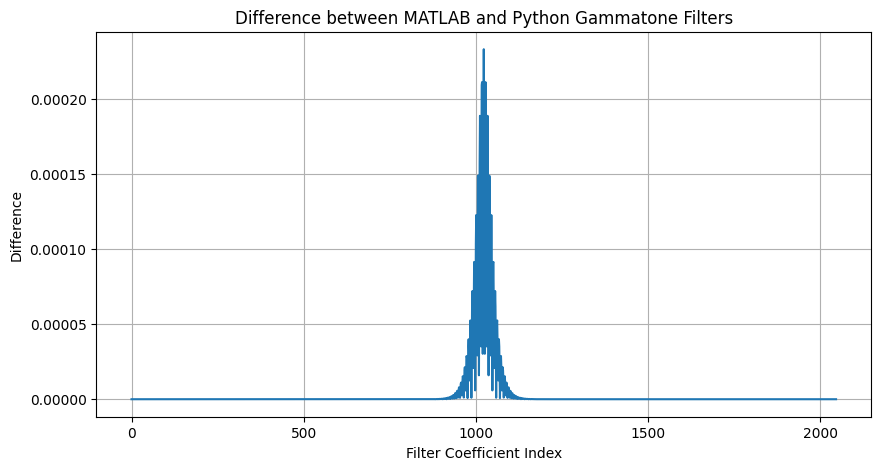

In [13]:
# Plot the difference between the two filters
plt.figure(figsize=(10, 5))
plt.plot(diff)
plt.title('Difference between MATLAB and Python Gammatone Filters')
plt.xlabel('Filter Coefficient Index')
plt.ylabel('Difference')
plt.grid()
plt.show()

## Embeddings (Matlab)

In [ ]:
# Avishai sent these files
MALE_EMBEDDINGS_TRAIN_PATH = "/Users/guyperets/Documents/MSc/PythonNotebooks/MatanPythonConversion/pmf_both_males_and_females/male/male_embedded_groups_1_1.mat"
MALE_TRAIN_BY_FILENAME = "/Users/guyperets/Documents/MSc/PythonNotebooks/MatanPythonConversion/pmf_both_males_and_females/male/male_chosen_labels_1_1_name.mat"
male_embeddings_mat = loadmat(MALE_EMBEDDINGS_TRAIN_PATH)
male_filenames_mat = loadmat(MALE_TRAIN_BY_FILENAME)
male_filenames_mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'chosen_labels_1_1_name'])

In [15]:
print(male_embeddings_mat['embedded_groups_1_1'].shape)
assert male_filenames_mat['chosen_labels_1_1_name'].shape[0] == male_embeddings_mat['embedded_groups_1_1'].shape[0], "Number of filenames and embeddings do not match"

(10464, 160)


## Division To Categories (& More Tests)

In [16]:
male_embeddings_by_filename = {}
for filename, embedding in zip(male_filenames_mat['chosen_labels_1_1_name'], male_embeddings_mat['embedded_groups_1_1']):
    filename = filename[0][0].split('/')[-1]
    male_embeddings_by_filename[filename] = embedding

In [ ]:
# Example
print(len(male_embeddings_by_filename))
list(male_embeddings_by_filename.keys())[:10] # Example of 10 filenames

In [18]:
bonafide_male_train_embeddings = {}
spoof_male_train_embeddings = {}
with open(PROTOCOL_TRAIN, 'r') as f:
    lines = f.readlines()
    print(f"Number of lines in protocol: {len(lines)}")
    for line in lines:
        spekaer_id, file_id, _, attack_id, label = line.split()
        file_id += '.flac'
        if file_id in list(male_embeddings_by_filename.keys()):
            if label == 'bonafide':
                bonafide_male_train_embeddings[file_id] = male_embeddings_by_filename[file_id]
            else:
                spoof_male_train_embeddings[file_id] = male_embeddings_by_filename[file_id]
assert len(bonafide_male_train_embeddings) + len(spoof_male_train_embeddings) == len(male_embeddings_by_filename), f"Number of bonafide {len(bonafide_male_train_embeddings)} and spoof {len(spoof_male_train_embeddings)} does not match the total number of embeddings {len(male_embeddings_by_filename)}"

Number of lines in protocol: 25380


In [19]:
print(f'Number of bonafide embeddings: {len(bonafide_male_train_embeddings)}')
print(f'Number of bonafide embeddings: {len(spoof_male_train_embeddings)}')

Number of bonafide embeddings: 1056
Number of bonafide embeddings: 9408


In [ ]:
OUTPUT_FOLDER = "/Users/guyperets/Documents/MSc/PythonNotebooks/MatanPythonConversion/GuyPythonConversion/male_bonafide_train_audio_files"
num_files_copied = 0
for file in bonafide_male_train_embeddings.keys():
    # Copy the file from the original folder to the new folder
    src = os.path.join(TRAIN_FILE_FOLDER, file)
    dst = os.path.join(OUTPUT_FOLDER, file)
    shutil.copy(src, dst)
    num_files_copied += 1
    
print(f'Number of bonafide files copied: {num_files_copied}')

Number of bonafide files copied: 1056


In [ ]:
# TODO Replace gfb filters with the ones from MATLAB
all_matlab_filters = np.concatenate((matlab_normal_filters, matlab_inverse_filters), axis=0)
if gfb.filters.shape != all_matlab_filters.shape:
    raise ValueError(f"Shape of gfb.filters {gfb.filters.shape} does not match shape of all_matlab_filters {all_matlab_filters.shape}")
gfb.filters = all_matlab_filters

In [22]:
pmf_bonafide_male_train = PMF(OUTPUT_FOLDER, PROTOCOL_TRAIN, ftype=gfb)
hist = pmf_bonafide_male_train.compute_hist_stream(num_bins=NUM_BINS, hist_edges=HIST_EDGES)

Loaded 1056 FLAC files.
Number of Bonafide samples in protocol: 2580
Number of Spoofed samples in protocol: 22800
Attack names in protocol: ['A01', 'A02', 'A03', 'A04', 'A05', 'A06']
[1000/1056] files processed


In [23]:
pmfs_bonafide_male_train = [hist[i][1] for i in range(len(hist))] # 20 pmfs, one for each filter

In [ ]:
pmf_all_train = PMF(TRAIN_FILE_FOLDER, PROTOCOL_TRAIN, ftype=gfb)
bonafide_pmfs = pmf_all_train.compute_hist_by_category_stream(num_bins=NUM_BINS, hist_edges=HIST_EDGES, category='bonafide')
spoof_pmfs = pmf_all_train.compute_hist_by_category_stream(num_bins=NUM_BINS, hist_edges=HIST_EDGES, category='spoof')

bonafide_pmfs = [bonafide_pmfs[i][1] for i in range(len(bonafide_pmfs))] # 20 pmfs, one for each filter
spoof_pmfs = [spoof_pmfs[i][1] for i in range(len(spoof_pmfs))] # 20 pmfs, one for each filter
print(f'Number of bonafide pmfs: {len(bonafide_pmfs)}')
print(f'Number of spoof pmfs: {len(spoof_pmfs)}')

In [25]:
pmfs_all_train = [hist[i][1] for i in range(len(hist))] # 20 pmfs, one for each filter

In [30]:
pmfs_all_train[19].shape

(65536,)

In [ ]:
# Measure the distance between the bonafide PMFs and the all PMFs
embeddings = np.zeros(((len(pmf_bonafide_male_train), 8)))
for i, pmfs in enumerate(pmf_bonafide_male_train):
    pass # TODO
        

### Gammatone Matlab Filters

In [18]:
# Use all mat_filters to create the PMFs
all_mat_filters = np.concatenate((matlab_normal_filters, matlab_inverse_filters), axis=0)
all_mat_filters.shape

(20, 2047)

## Verify Histograms (Not Done)

In [7]:
mat = loadmat(MATAN_HIST_DETAILS)
print(mat.keys())
matlab_bins = mat['hist_bins'][0][0][0]
print(min(matlab_bins))

dict_keys(['__header__', '__version__', '__globals__', 'hist_bins', 'wanted_hist', '__function_workspace__'])
-0.999969482421875


### Verify Histogram Edges

In [8]:
my_bins = np.linspace(HIST_EDGES[0], HIST_EDGES[1], NUM_BINS)
print(f'matlab: {matlab_bins[0]}, python: {my_bins[0]}')
print(f'matlab: {matlab_bins[1]}, python: {my_bins[1]}')
assert 0.0 in my_bins, "There is no 0 in the python bins"
mismatch_bins = []
for pybin, matbin in zip(my_bins, matlab_bins):
    if pybin != matbin:
        mismatch_bins.append((pybin, matbin))
if mismatch_bins is None:
    print('All bins are equal')
else:
    print(f'Found {len(mismatch_bins)} mismatched bins')
    for pybin, matbin in mismatch_bins:
        print(f'Python bin: {pybin}, Matlab bin: {matbin}')

matlab: -0.999969482421875, python: -0.999969482421875
matlab: -0.99993896484375, python: -0.99993896484375
Found 0 mismatched bins


### Seperate Spoof/Bonafide Male/Female

In [ ]:
# Load the json file
with open(MATAN_RESULT_JSON, 'r') as f:
    data = json.load(f)
print(len(data))

In [ ]:
MATLAB_NUM_OF_SAMPLES_MALE_BONAFIDE_HIST = 85087859 # From the file Avishai sent
matlab_bonafide_female_hists = None
for row in data:
    # Print the set = "train" where also attack logical = "none"
    if row['set'] == 'train' and row['attack_logical'] == 'none' and row['sex'] == 'female':
        matlab_bonafide_female_hists = row['hist']
        break

assert np.sum(matlab_bonafide_female_hists[0]) == MATLAB_NUM_OF_SAMPLES_MALE_BONAFIDE_HIST, "Number of samples in this histogram is not equal (Python vs Matlab)"
    

In [ ]:
speaker_id_gender_mapping_cm = {
    'LA_0079': 'female',
    'LA_0080': 'female',
    'LA_0081': 'female',
    'LA_0082': 'male',
    'LA_0083': 'male',
    'LA_0084': 'female',
    'LA_0085': 'female',
    'LA_0086': 'female',
    'LA_0087': 'female',
    'LA_0088': 'female',
    'LA_0089': 'male', # ! Not sure, but it matches the count (12 Female, 8 Male)
    'LA_0090': 'female',
    'LA_0091': 'female',
    'LA_0092': 'male',
    'LA_0093': 'male',
    'LA_0094': 'male',
    'LA_0095': 'male',
    'LA_0096': 'male',
    'LA_0097': 'female',
    'LA_0098': 'female',
}

In [12]:
# Create a mapping of file ids to lists of male and female speaker ids
with open(PROTOCOL_TRAIN, 'r') as f:
    lines = f.readlines()
    bonafide_file_ids_male = []
    bonafide_file_ids_female = []
    spoof_file_ids_male = []
    spoof_file_ids_female = []
    for line in lines:
        speaker_id, file_id, _, _, label = line.split()
        if label == 'bonafide':
            if speaker_id_gender_mapping_cm[speaker_id] == 'male':
                bonafide_file_ids_male.append(file_id)
            else:
                bonafide_file_ids_female.append(file_id)
        else:
            if speaker_id_gender_mapping_cm[speaker_id] == 'male':
                spoof_file_ids_male.append(file_id)
            else:
                spoof_file_ids_female.append(file_id)
                
print(f'Number of male bonafide files: {len(bonafide_file_ids_male)}')
print(f'Number of female bonafide files: {len(bonafide_file_ids_female)}')
print(f'Number of male spoof files: {len(spoof_file_ids_male)}')
print(f'Number of female spoof files: {len(spoof_file_ids_female)}')


Number of male bonafide files: 1056
Number of female bonafide files: 1524
Number of male spoof files: 9408
Number of female spoof files: 13392


In [13]:
PARENT_FOLDER = "/Users/guyperets/Documents/MSc/Datasets/ASVSpoof2019/LA/ASVspoof2019_LA_train/"
CATEGORY = ["bonafide_male", "bonafide_female", "spoof_male", "spoof_female"]
FULL_FOLDER_NAMES = {}
# Create folders for each category 
import os
import shutil
for category in CATEGORY:
    folder_path = os.path.join(PARENT_FOLDER, category)
    FULL_FOLDER_NAMES[category] = folder_path
    if not os.path.exists(folder_path):
        os.makedirs(folder_path, exist_ok=True)
        
for category, full_folder_name in FULL_FOLDER_NAMES.items():
    print(f'Created folder for category {category}: {full_folder_name}')

Created folder for category bonafide_male: /Users/guyperets/Documents/MSc/Datasets/ASVSpoof2019/LA/ASVspoof2019_LA_train/bonafide_male
Created folder for category bonafide_female: /Users/guyperets/Documents/MSc/Datasets/ASVSpoof2019/LA/ASVspoof2019_LA_train/bonafide_female
Created folder for category spoof_male: /Users/guyperets/Documents/MSc/Datasets/ASVSpoof2019/LA/ASVspoof2019_LA_train/spoof_male
Created folder for category spoof_female: /Users/guyperets/Documents/MSc/Datasets/ASVSpoof2019/LA/ASVspoof2019_LA_train/spoof_female


In [14]:
# Copy the files to the new folders
def copy_files(file_ids, source_folder, dest_folder):
    for file_id in file_ids:
        source_file = os.path.join(source_folder, file_id + ".flac")
        dest_file = os.path.join(dest_folder, file_id + ".flac")
        shutil.copy(source_file, dest_file)
    print(f'Copied {len(file_ids)} files to {dest_folder}.')
    
copy_files(bonafide_file_ids_male, TRAIN_FILE_FOLDER, FULL_FOLDER_NAMES['bonafide_male'])
copy_files(bonafide_file_ids_female, TRAIN_FILE_FOLDER, FULL_FOLDER_NAMES['bonafide_female'])
copy_files(spoof_file_ids_male, TRAIN_FILE_FOLDER, FULL_FOLDER_NAMES['spoof_male'])
copy_files(spoof_file_ids_female, TRAIN_FILE_FOLDER, FULL_FOLDER_NAMES['spoof_female'])

Copied 1056 files to /Users/guyperets/Documents/MSc/Datasets/ASVSpoof2019/LA/ASVspoof2019_LA_train/bonafide_male.
Copied 1524 files to /Users/guyperets/Documents/MSc/Datasets/ASVSpoof2019/LA/ASVspoof2019_LA_train/bonafide_female.
Copied 9408 files to /Users/guyperets/Documents/MSc/Datasets/ASVSpoof2019/LA/ASVspoof2019_LA_train/spoof_male.
Copied 13392 files to /Users/guyperets/Documents/MSc/Datasets/ASVSpoof2019/LA/ASVspoof2019_LA_train/spoof_female.


In [ ]:
# Create PMFs for specific categories
agg_hist_bonafide_male_all_filtered = PMF(FULL_FOLDER_NAMES['bonafide_male'], PROTOCOL_TRAIN, gfb).compute_hist(num_bins=NUM_BINS, hist_edges=HIST_EDGES)
agg_hist_bonafide_female_all_filtered = PMF(FULL_FOLDER_NAMES['bonafide_female'], PROTOCOL_TRAIN, gfb).compute_hist(num_bins=NUM_BINS, hist_edges=HIST_EDGES)
assert len(agg_hist_bonafide_female_all_filtered) == 20, "Num of PMFs is not equal to 20 (10 Gammatone, 10 Inverse Gammatone)"

Loaded 1524 FLAC files.
Number of Bonafide samples in protocol: 2580
Number of Spoofed samples in protocol: 22800
Attack names in protocol: ['A01', 'A02', 'A03', 'A04', 'A05', 'A06']


### Demonstrating The Differences In The Histograms

In [ ]:
for i, (agg_hist, agg_pmf) in enumerate(agg_hist_bonafide_female_all_filtered):
    print(f'Num of samples in hist: {np.sum(agg_hist)}')
    matched_hist = matlab_bonafide_female_hists[0]
    num_of_mimatches = 0
    max_mismatch_size = 0
    second_max_mismatch_size = 0
    difference = []
    assert np.sum(agg_hist) == MATLAB_NUM_OF_SAMPLES_MALE_BONAFIDE_HIST, f"Number of samples in this histogram is not equal: Python ({np.sum(agg_hist)}) vs Matlab {MATLAB_NUM_OF_SAMPLES_MALE_BONAFIDE_HIST})"
    for bin in range(len(agg_hist)):
        mismatch_size = abs(agg_hist[bin] - matched_hist[bin])
        difference.append(mismatch_size)
        if abs(agg_hist[bin] - matched_hist[bin]) > 1e-9:
            print(f'Found a mismatch in bin {bin} for histogram {i}')
            print(f'Python histogram: {agg_hist[bin]}, Matlab histogram: {matched_hist[bin]}\n')
            if mismatch_size > max_mismatch_size:
                second_max_mismatch_size = max_mismatch_size
                max_mismatch_size = mismatch_size
                bin_max_mismatch = my_bins[bin]
                bin_mat_max_mismatch = matlab_bins[bin]
            num_of_mimatches += 1
    print(f'Num of mismatches: {num_of_mimatches}')
    print(f'Max mismatch size: {max_mismatch_size} at bin {bin_max_mismatch} (Python) and {bin_mat_max_mismatch} (Matlab)')
    print(f'Second max mismatch size: {second_max_mismatch_size}')
    # Plot the histograms between bin 30000 and 40000
    plt.plot(matched_hist[32760:32775], label='Matlab')
    plt.plot(agg_hist[32760:32775], label='Python')
    plt.title(f'Histogram {i}')
    plt.xlabel('Bin')
    plt.ylabel('Count')
    plt.legend()
    plt.show()
    
    plt.plot(difference, label='Difference Function')
    plt.title(f'Difference Function for Histogram {i}')
    plt.xlabel('Bin')
    plt.ylabel('Difference Between Python and Matlab')
    # plt.ylim(0, 54799940)
    plt.legend()
    plt.show()
    print(f'Sum of mismatches: {np.sum(difference)}')
    assert 0 # For debugging purposes, stop here to analyze the results


### JSON Tests

In [11]:
import json

JSON_PATH = "/Users/guyperets/Documents/MSc/PythonNotebooks/MatanPythonConversion/GuyPythonConversion/hist_data_formatted.json"

with open(JSON_PATH, "r") as infile:
    data = json.load(infile)
    
keys = data[0].keys()
list(keys)

['year',
 'set',
 'attack_genre',
 'is_spoofed',
 'sex',
 'filter_type',
 'filter_num_of_channels',
 'attack_logical',
 'room_size',
 'T60',
 'talker_to_asv_dist',
 'attacker_to_talker_dist',
 'replay_quality',
 'number_of_relevant_files',
 'hist',
 'samples_in_hist']

In [12]:
train_hists_spoof = []
train_hists_bonafide = []
num_of_files = 0
for line in data:
    if line['set'] == 'train':
        if line['is_spoofed'] == 'no':
            train_hists_bonafide.append(line['hist'])
        elif line['is_spoofed'] == 'yes':
            train_hists_spoof.append(line['hist'])
        num_of_files += line['number_of_relevant_files']
        
print(f"Number of train files: {num_of_files}")

Number of train files: 25380


In [8]:
train_hists_bonafide_all = np.array(train_hists_bonafide)
merged_histograms = np.sum(train_hists_bonafide_all, axis=0)

normalized_histograms = []
for i, hist in enumerate(merged_histograms):
    # Normalize the histogram
    normalized_hist = hist / np.sum(hist)
    assert np.isclose(np.sum(normalized_hist), 1), f"Histogram {i} does not sum to 1"
    normalized_histograms.append(normalized_hist)
    
normalized_histograms = np.array(normalized_histograms)
print(normalized_histograms.shape)
print(normalized_histograms[0].shape) # Now so each element is a histogram (i.e. a vector of 2^16 elements)
assert normalized_histograms.shape[1] == NUM_BINS, "Histogram does not have the correct number of bins"
assert np.isclose(np.sum(normalized_histograms, axis=1), 1).all(), "Not all histograms sum to 1"

(10, 65536)
(65536,)


# Example Of Entire Set's PMF

In [12]:
pmf_t = PMF(TRAIN_FILE_FOLDER, PROTOCOL_TRAIN)

Loaded 25380 FLAC files.
Number of Bonafide samples: 2580
Number of Spoofed samples: 22800
Attacks: ['A01', 'A02', 'A03', 'A04', 'A05', 'A06']


In [13]:
pmf_d = PMF(DEV_FILE_FOLDER, PROTOCOL_DEV)

Loaded 24986 FLAC files.
Number of Bonafide samples: 2548
Number of Spoofed samples: 22296
Attacks: ['A01', 'A02', 'A03', 'A04', 'A05', 'A06']


In [14]:
pmf_e = PMF(EVAL_FILE_FOLDER, PROTOCOL_EVAL)

Loaded 71933 FLAC files.
Number of Bonafide samples: 7355
Number of Spoofed samples: 63882
Attacks: ['A07', 'A08', 'A09', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19']


## Train Set

In [15]:
pmf_train_spoof, edges_train_spoof = pmf_t.compute_hist_by_category("spoof", num_bins=NUM_BINS, hist_edges=HIST_EDGES)

In [16]:
pmf_train_bonafide, edges_train_bonafide = pmf_t.compute_hist_by_category("bonafide", num_bins=NUM_BINS, hist_edges=HIST_EDGES)

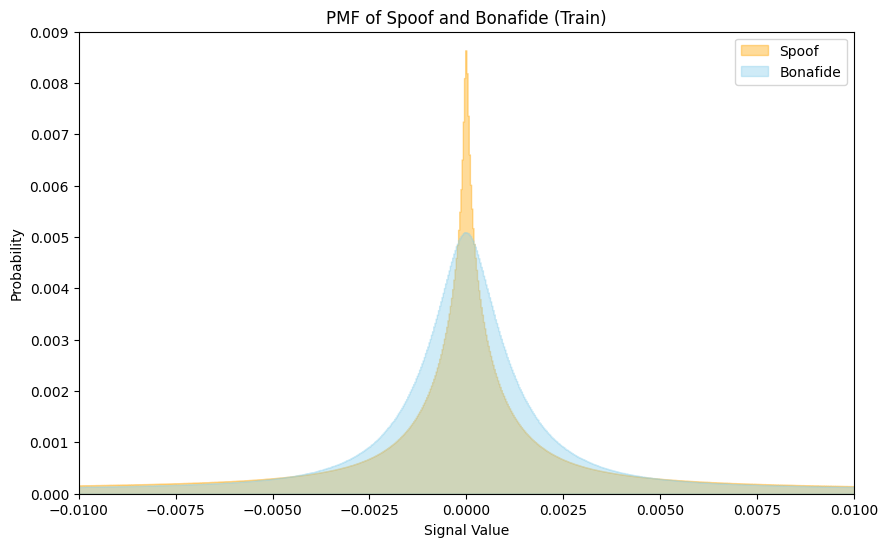

In [17]:
centers_train_spoof = (edges_train_spoof[:-1] + edges_train_spoof[1:]) / 2
centers_train_bonafide = (edges_train_bonafide[:-1] + edges_train_bonafide[1:]) / 2
plt.figure(figsize=(10, 6))

plt.fill_between(
    centers_train_spoof,
    pmf_train_spoof,
    step='pre',
    color='orange',
    alpha=0.4,
    label='Spoof'
)

plt.fill_between(
    centers_train_bonafide,
    pmf_train_bonafide,
    step='pre',
    color='skyblue',
    alpha=0.4,
    label='Bonafide'
)

plt.title('PMF of Spoof and Bonafide (Train)')
plt.xlabel('Signal Value')
plt.ylabel('Probability')
plt.ylim(0, 9e-3)
plt.xlim(-0.01, 0.01)
plt.legend()
plt.show()

In [18]:
from PMF_measure_utils import *

chi_square_test(pmf_train_spoof, pmf_train_bonafide)
correlation_distance(pmf_train_spoof, pmf_train_bonafide)
hellinger_distance(pmf_train_spoof, pmf_train_bonafide)
kullback_leibler_divergence(pmf_train_spoof, pmf_train_bonafide)
symmetric_kullback_leibler_divergence(pmf_train_spoof, pmf_train_bonafide)
intersection_distance(pmf_train_spoof, pmf_train_bonafide)
jensen_shannon_divergence(pmf_train_spoof, pmf_train_bonafide)

print("\nComputed all measurements")


Computed all measurements


## Dev Set

In [19]:
pmf_dev_spoof, edges_dev_spoof = pmf_d.compute_hist_by_category("spoof", num_bins=NUM_BINS, hist_edges=HIST_EDGES)

In [20]:
pmf_dev_bonafide, edges_dev_bonafide = pmf_d.compute_hist_by_category("bonafide", num_bins=NUM_BINS, hist_edges=HIST_EDGES)

In [ ]:
centers_dev_spoof = (edges_dev_spoof[:-1] + edges_dev_spoof[1:]) / 2
centers_dev_bonafide = (edges_dev_bonafide[:-1] + edges_dev_bonafide[1:]) / 2
plt.figure(figsize=(10, 6))

plt.fill_between(
    centers_dev_spoof,
    pmf_dev_spoof,
    step='pre',
    color='orange',
    alpha=0.4,
    label='Spoof'
)

plt.fill_between(
    centers_dev_bonafide,
    pmf_dev_bonafide,
    step='pre',
    color='skyblue',
    alpha=0.4,
    label='Bonafide'
)

plt.title('PMF of Spoof and Bonafide (Dev)')
plt.xlabel('Signal Value')
plt.ylabel('Probability')
plt.ylim(0, 9e-3)
plt.legend()
plt.show()

## Eval Set

In [22]:
pmf_eval_spoof, edges_eval_spoof = pmf_e.compute_hist_by_category("spoof", num_bins=NUM_BINS, hist_edges=HIST_EDGES)

In [23]:
pmf_eval_bonafide, edges_eval_bonafide = pmf_e.compute_hist_by_category("bonafide", num_bins=NUM_BINS, hist_edges=HIST_EDGES)

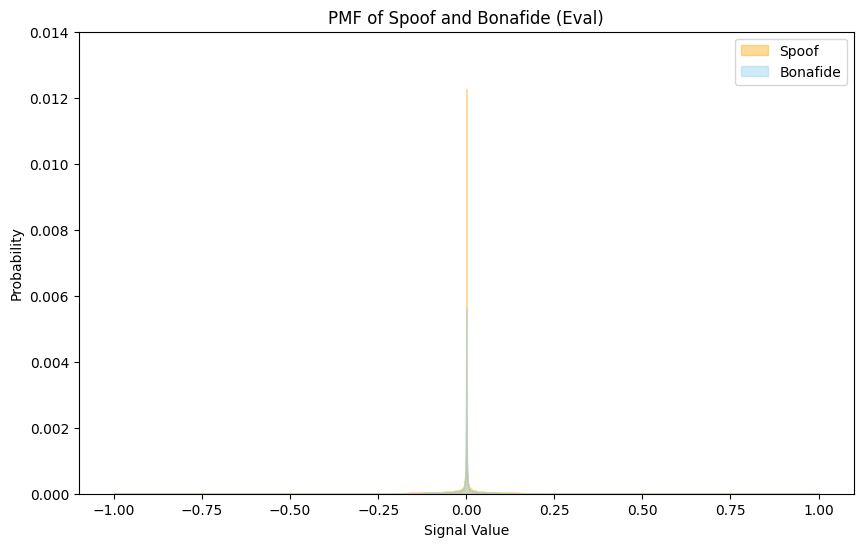

In [24]:
centers_eval_spoof = (edges_eval_spoof[:-1] + edges_eval_spoof[1:]) / 2
centers_eval_bonafide = (edges_eval_bonafide[:-1] + edges_eval_bonafide[1:]) / 2
plt.figure(figsize=(10, 6))

plt.fill_between(
    centers_eval_spoof,
    pmf_eval_spoof,
    step='pre',
    color='orange',
    alpha=0.4,
    label='Spoof'
)

plt.fill_between(
    centers_eval_bonafide,
    pmf_eval_bonafide,
    step='pre',
    color='skyblue',
    alpha=0.4,
    label='Bonafide'
)

plt.title('PMF of Spoof and Bonafide (Eval)')
plt.xlabel('Signal Value')
plt.ylabel('Probability')
plt.ylim(0, 14e-3)
plt.legend()
plt.show()

# More Example Usage

## Seperate Spoof/Bonafide

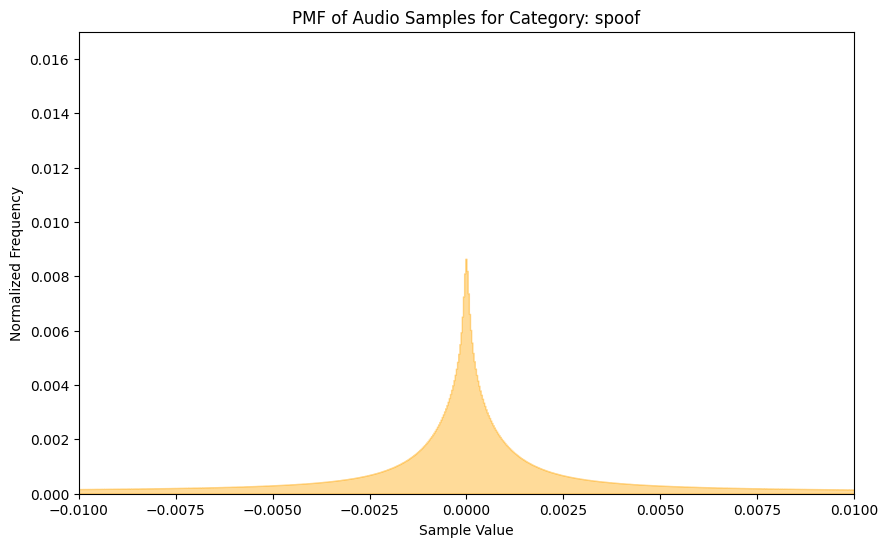

In [25]:
pmf_t.plot_by_category("spoof", hist_edges=HIST_EDGES, num_bins=NUM_BINS)

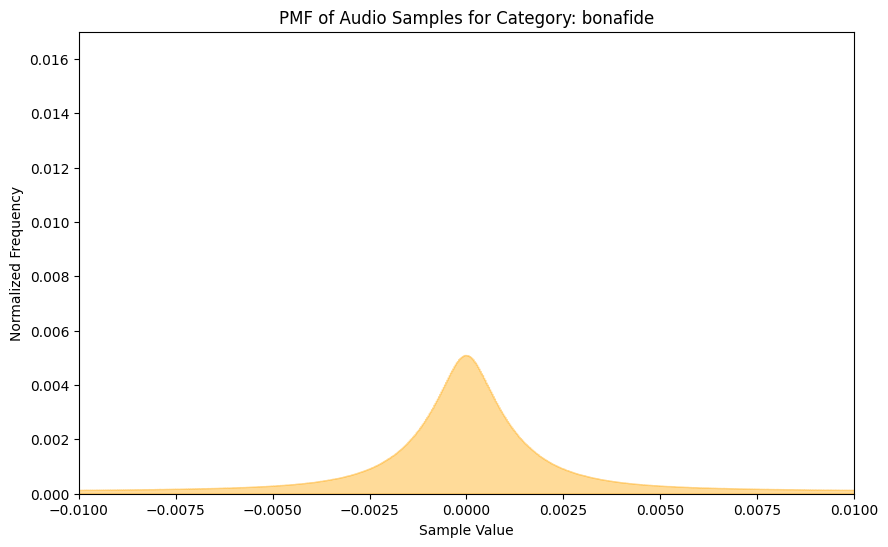

In [26]:
pmf_t.plot_by_category("bonafide", hist_edges=HIST_EDGES, num_bins=NUM_BINS)

## Seperate Attacks (Train)

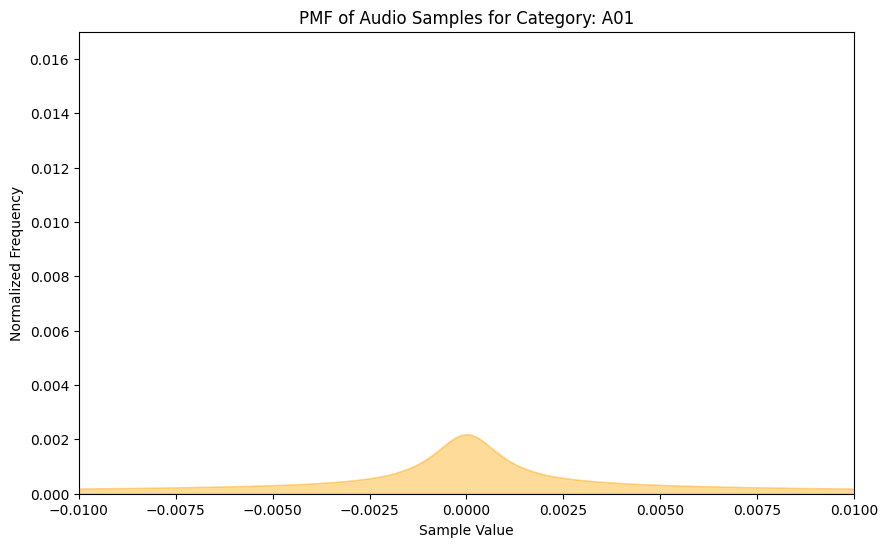

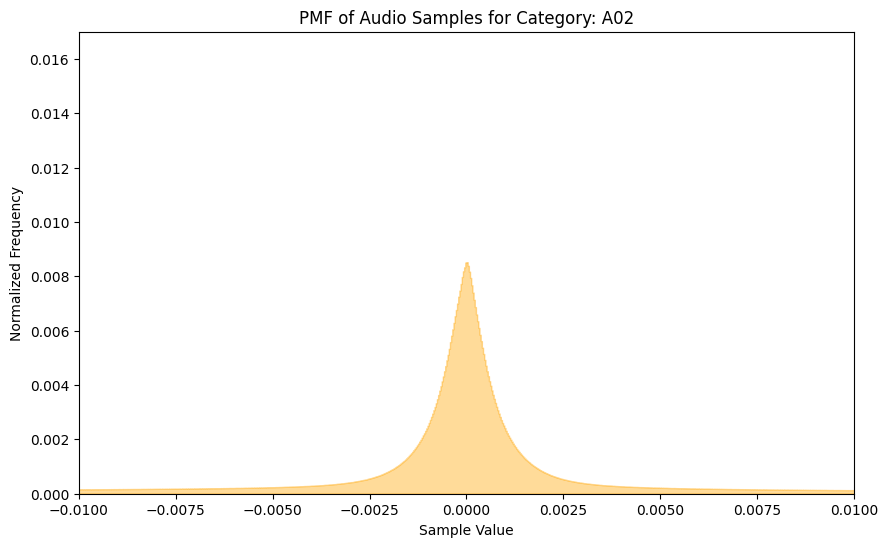

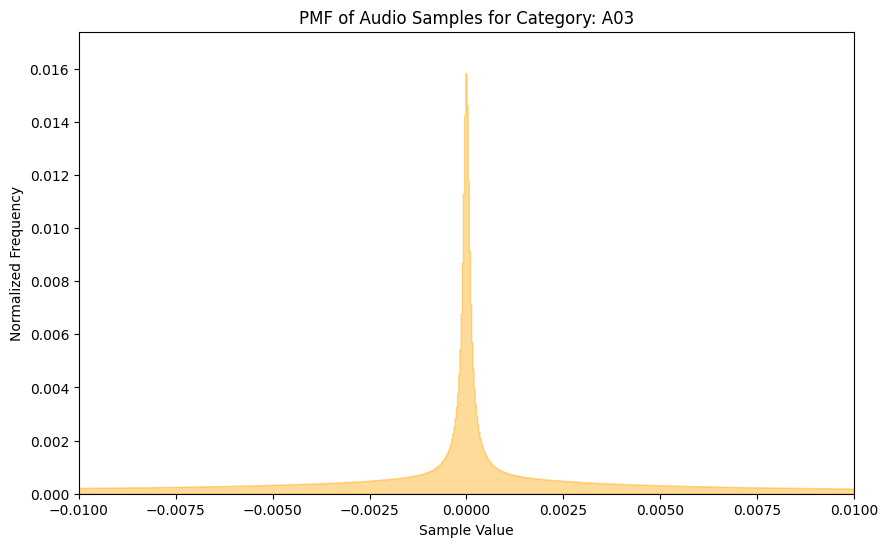

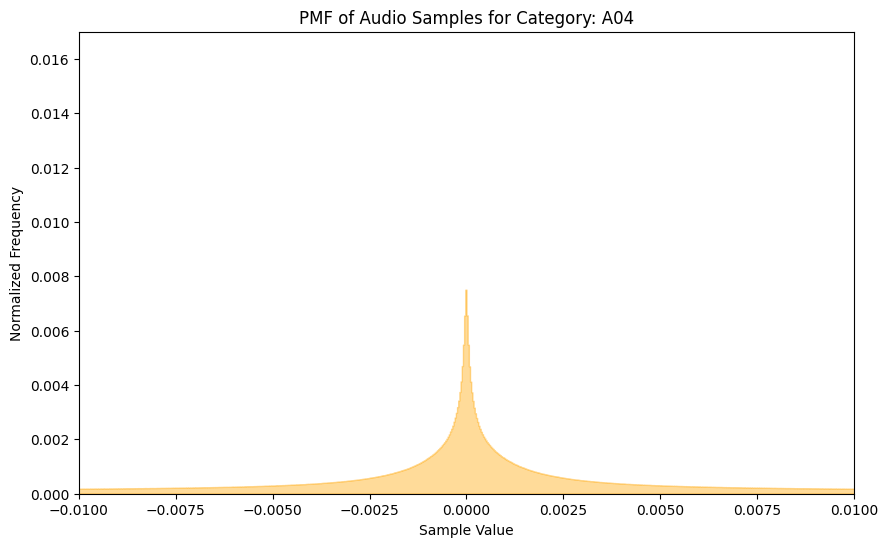

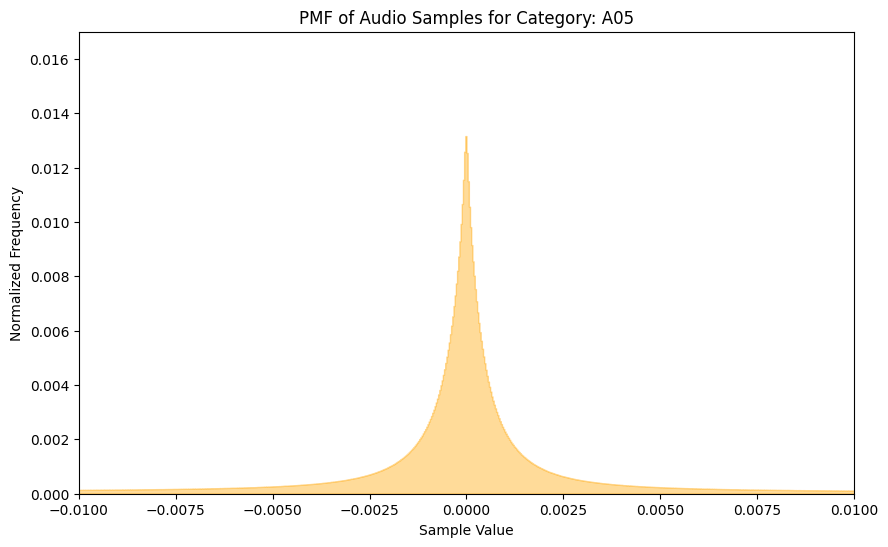

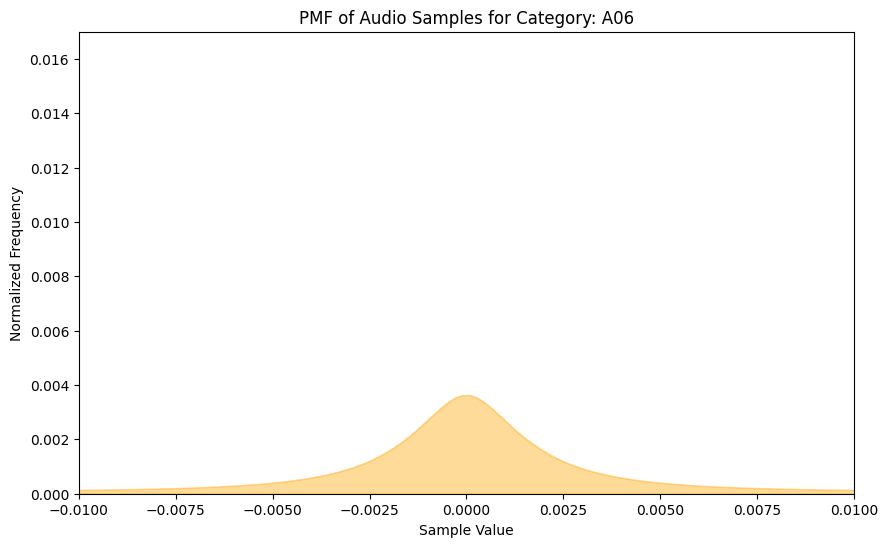

In [27]:
TRAIN_ATTACKS = list(pmf_t.attack_files.keys())
for i, attack in enumerate(TRAIN_ATTACKS):
    pmf_t.plot_by_category(attack, hist_edges=HIST_EDGES, num_bins=NUM_BINS)

In [28]:
pmf_per_attack = {}
edges_per_attack = {}
for attack in TRAIN_ATTACKS:
    pmf_per_attack[attack], edges_per_attack[attack] = pmf_t.compute_hist_by_category(attack, num_bins=NUM_BINS, hist_edges=HIST_EDGES)


## Seperate Attacks (Dev)

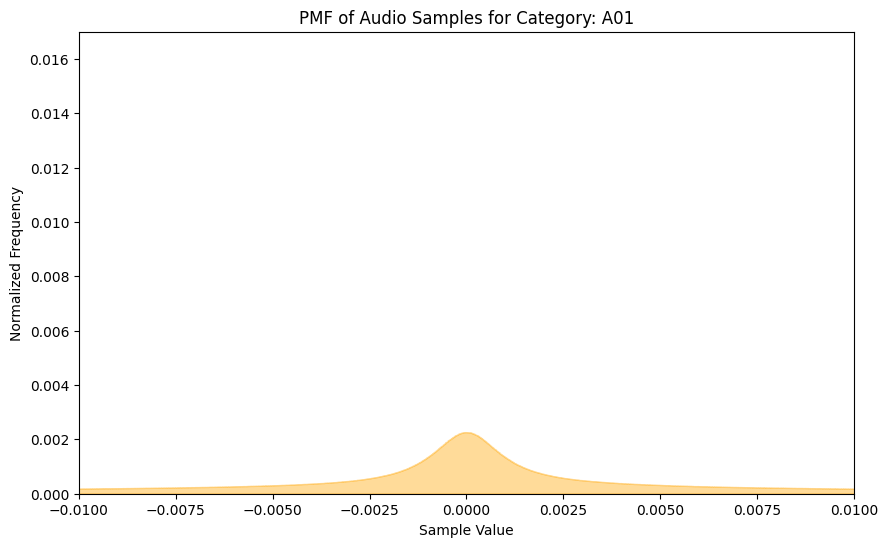

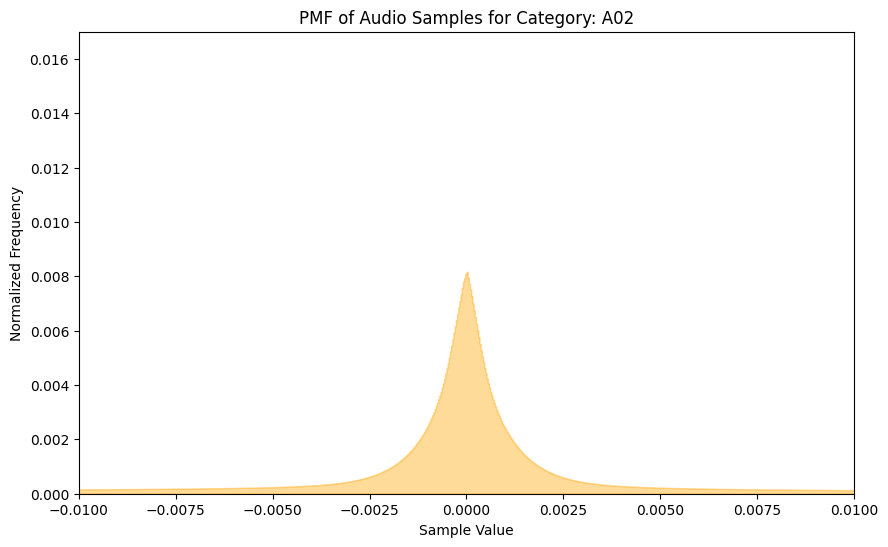

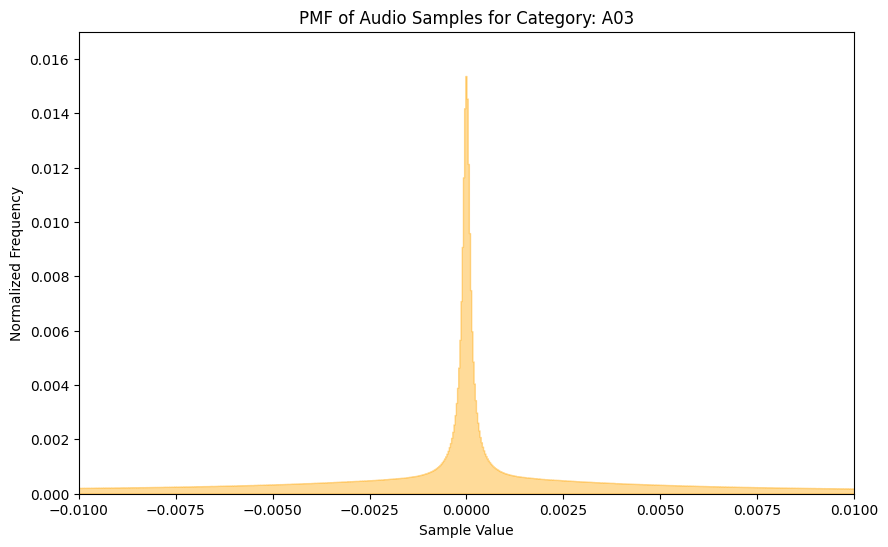

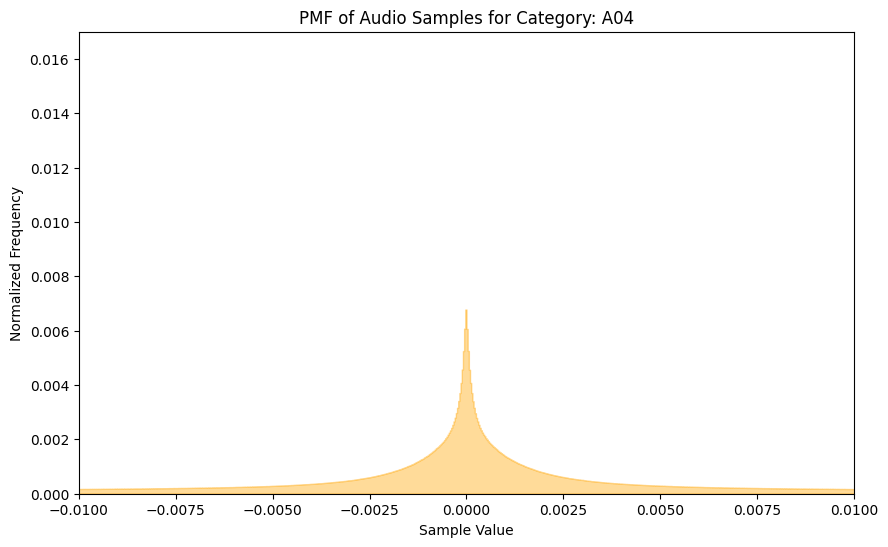

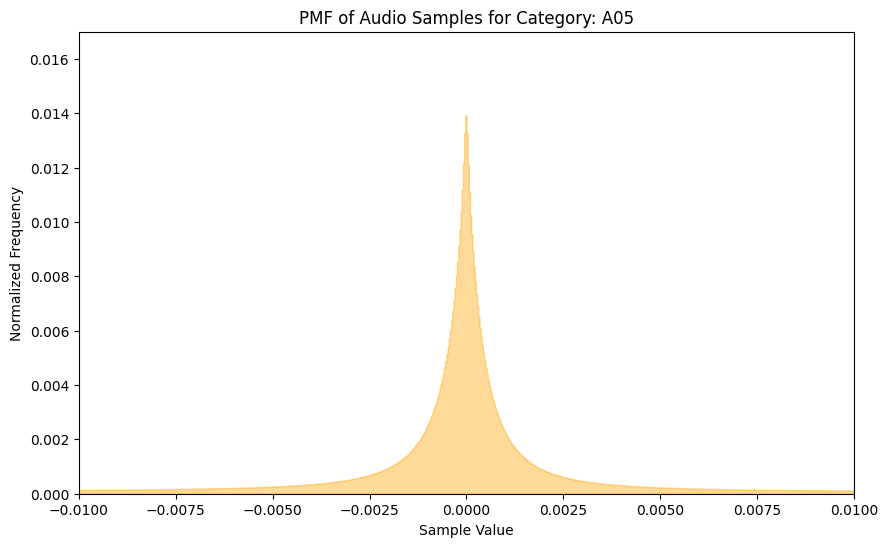

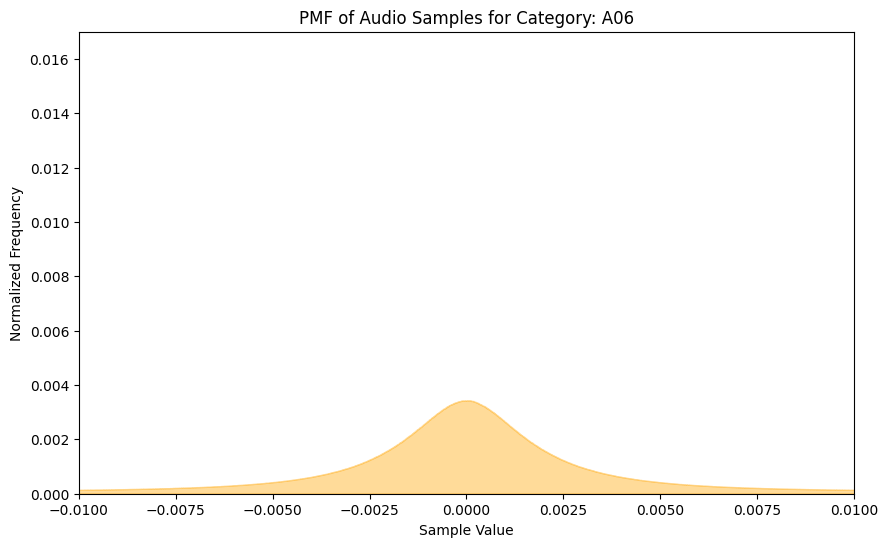

In [29]:
DEV_ATTACKS = list(pmf_t.attack_files.keys())
for i, attack in enumerate(DEV_ATTACKS):
    pmf_d.plot_by_category(attack, hist_edges=HIST_EDGES, num_bins=NUM_BINS)

## Seperate Attacks (Eval)

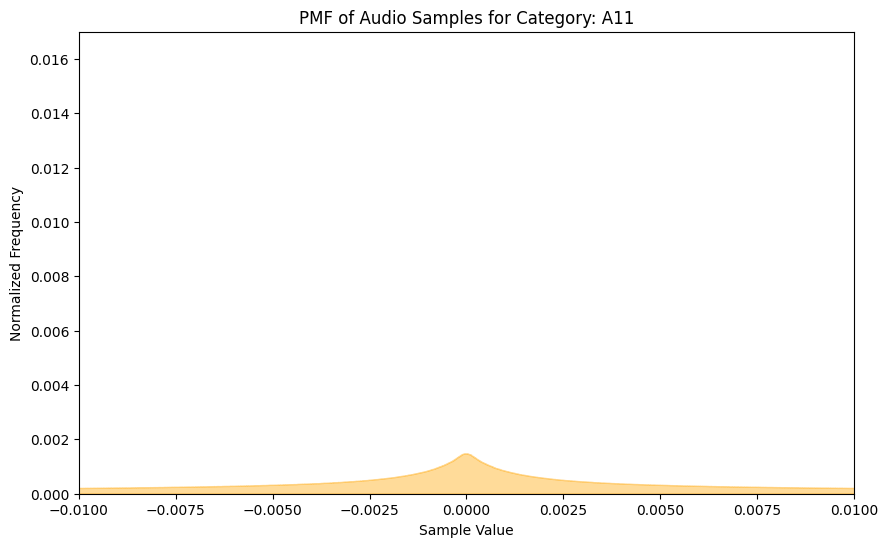

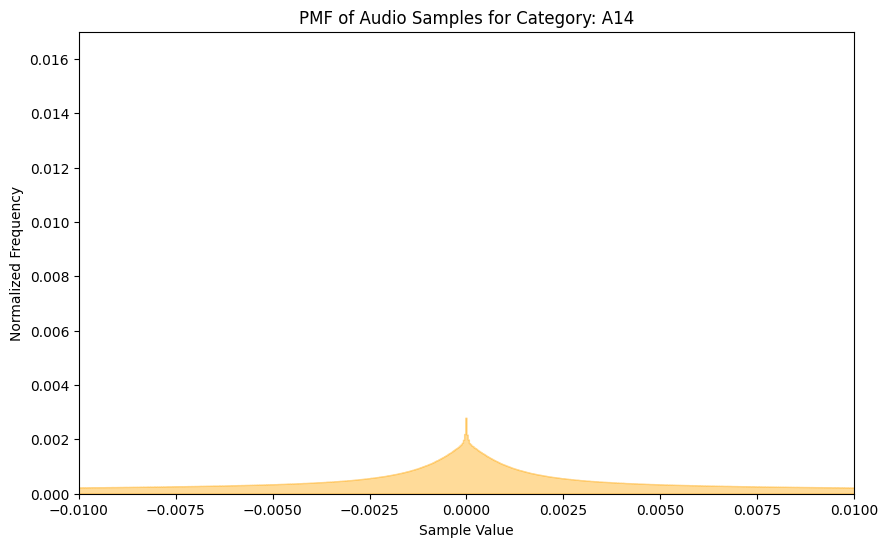

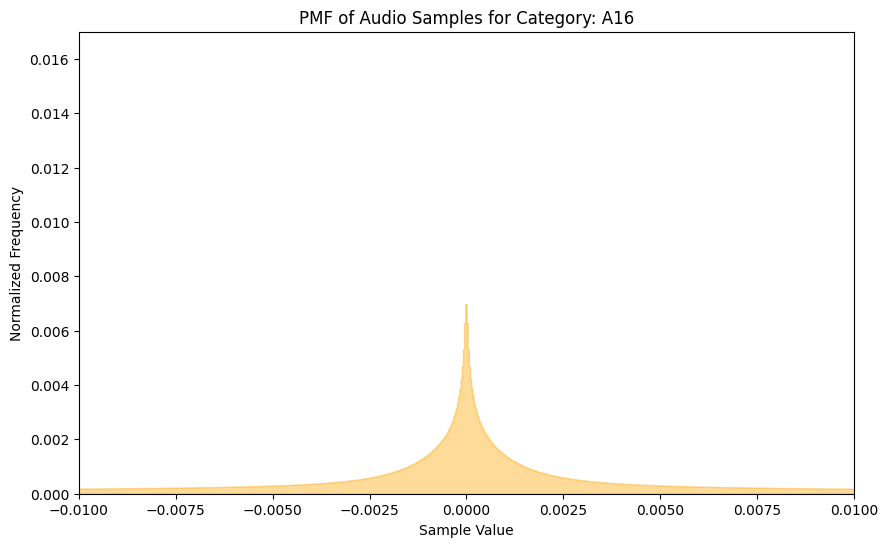

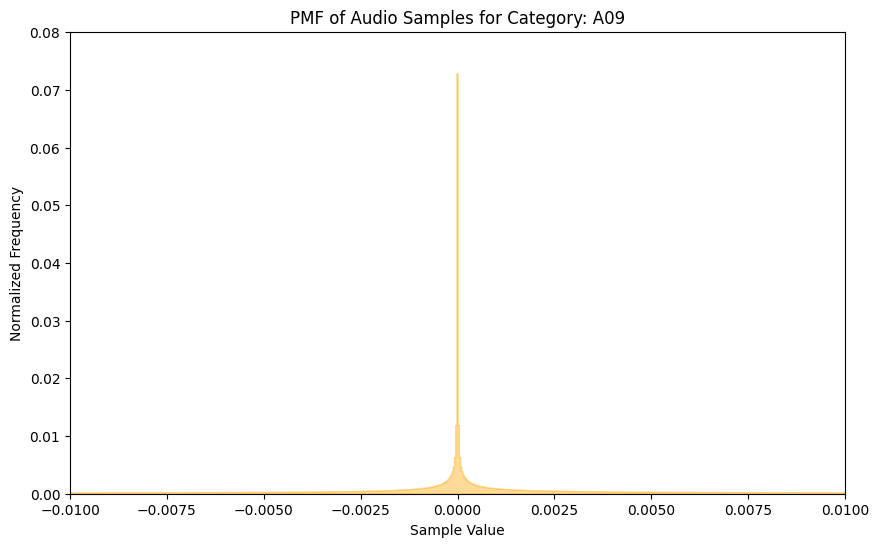

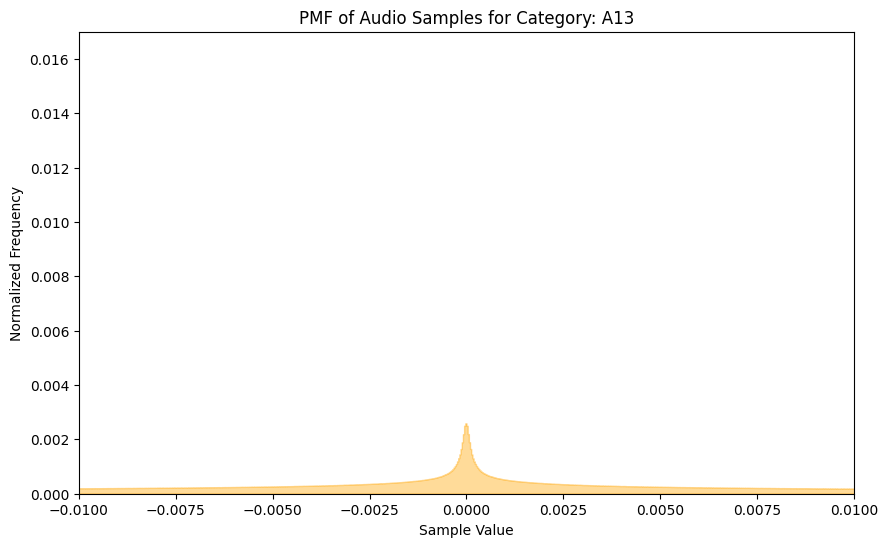

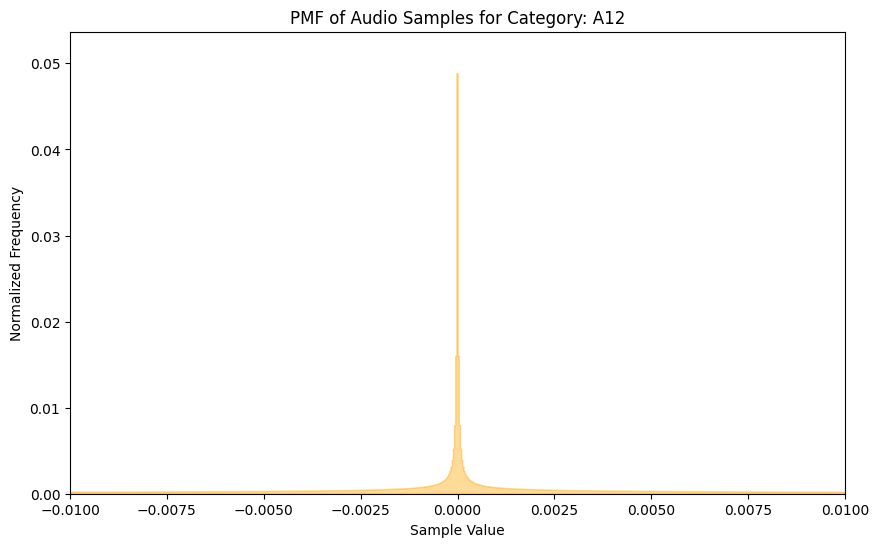

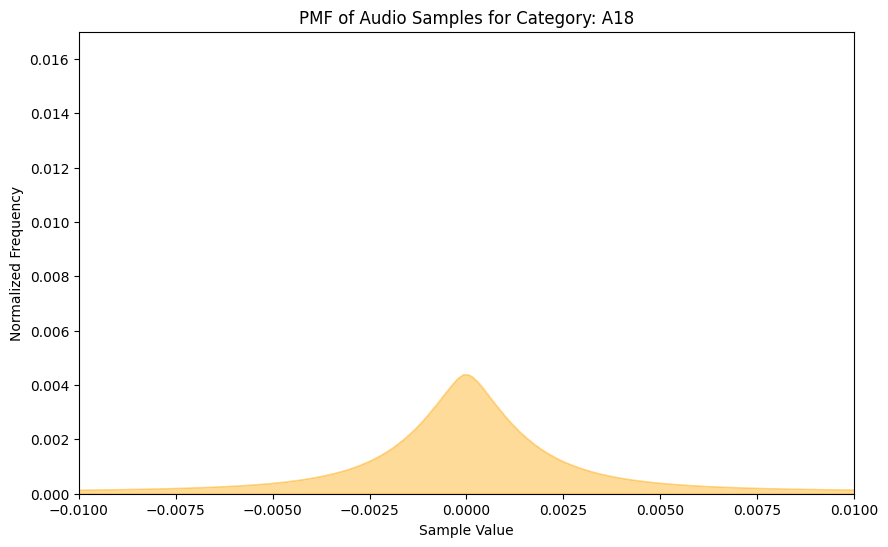

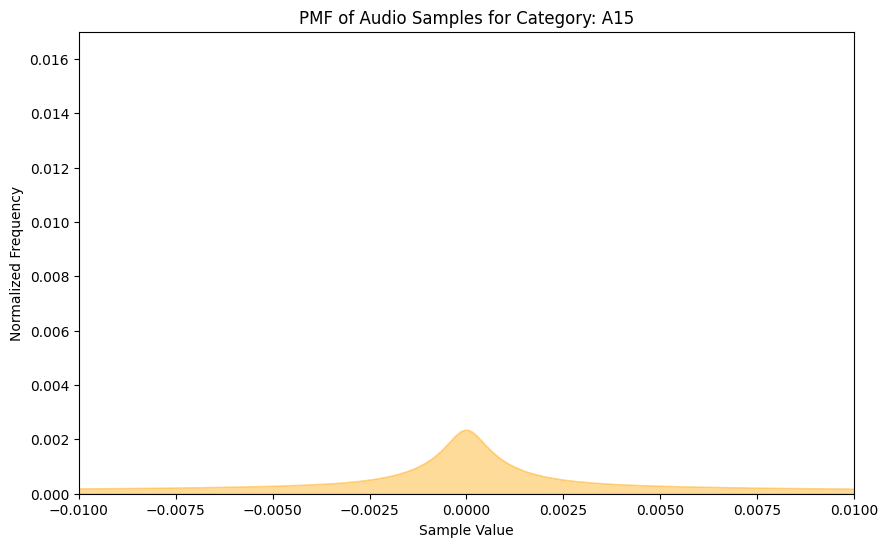

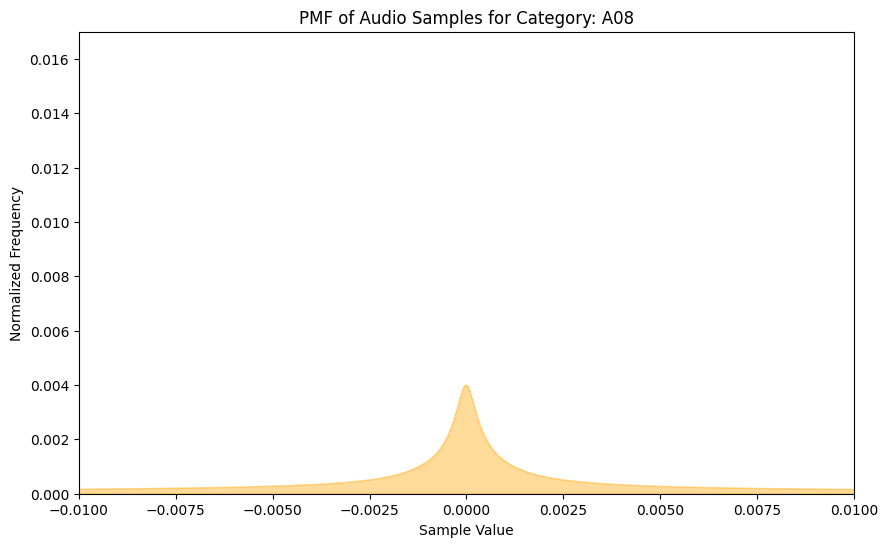

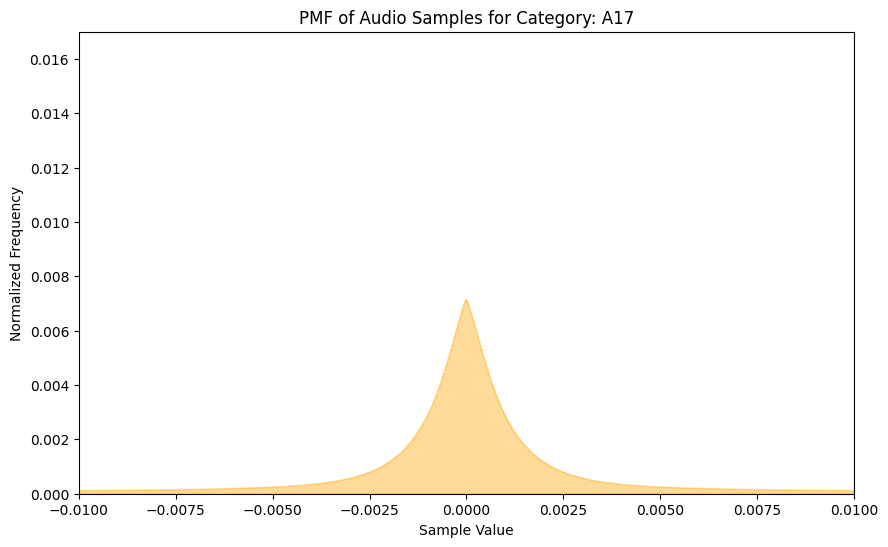

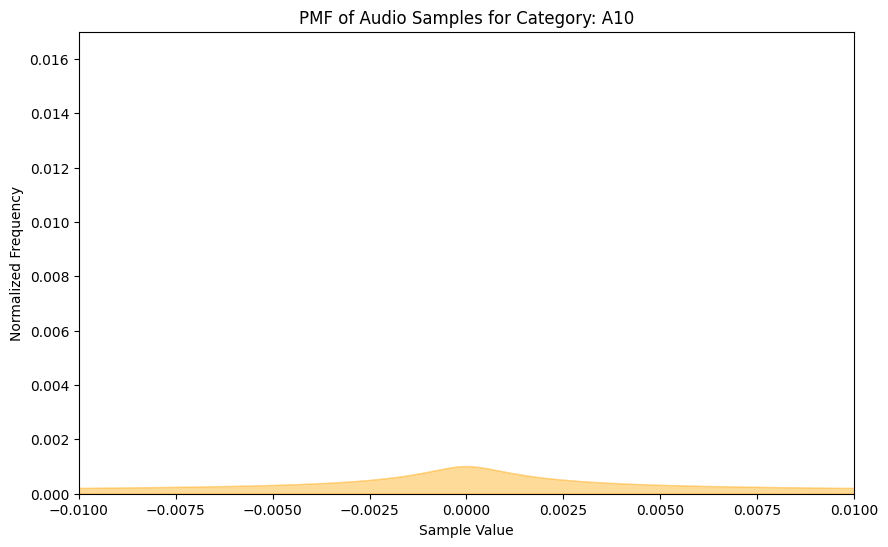

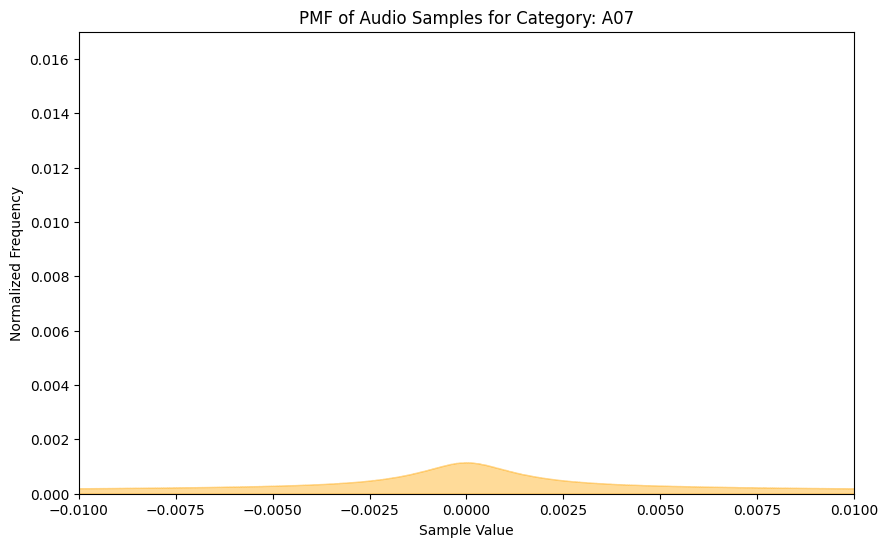

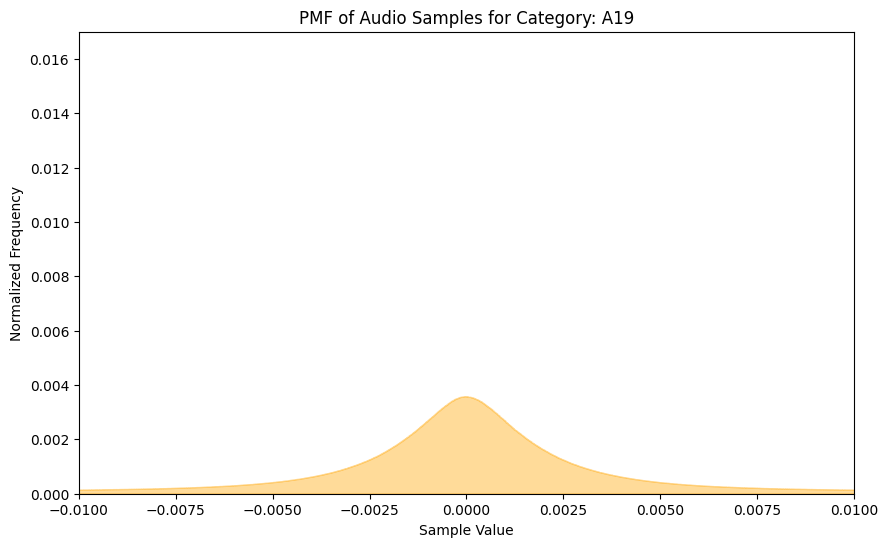

In [30]:
EVAL_ATTACKS = list(pmf_e.attack_files.keys())
for i, attack in enumerate(EVAL_ATTACKS):
    pmf_e.plot_by_category(attack, hist_edges=HIST_EDGES, num_bins=NUM_BINS)

## Create Attacks PMF Combined Image

In [ ]:
# import os
# import glob 
# import math
# from PIL import Image, ImageDraw, ImageFont

# # Set the path to your folder containing the images.
# folder = "/Users/guyperets/Documents/MSc/PMFs_PerAttack"  # update with your folder path

# def get_sorted_images(prefix):
#     """
#     Returns a sorted list of image file paths that start with the given prefix (e.g., "train", "dev", "eval").
#     Sorting is based on the two-digit number following 'a' in the file name.
#     """
#     pattern = os.path.join(folder, f"{prefix}_a*.*")
#     files = glob.glob(pattern)
    
#     def extract_number(filepath):
#         base = os.path.basename(filepath)
#         try:
#             part = base.split('_')[1]  # e.g. "a01.png"
#             num_str = ''.join(filter(str.isdigit, part))
#             return int(num_str)
#         except Exception:
#             return 0

#     return sorted(files, key=extract_number)

# # Retrieve sorted image lists for each group.
# train_files = get_sorted_images("train")
# dev_files   = get_sorted_images("dev")
# eval_files  = get_sorted_images("eval")

# # Define groups in the desired order.
# groups = [
#     {"name": "train", "files": train_files},
#     {"name": "dev", "files": dev_files},
#     {"name": "eval", "files": eval_files}
# ]

# # Image dimensions (original size)
# img_width = 863
# img_height = 547
# images_per_row = 6

# # Spacing and layout parameters
# gap_x = 10                # Horizontal gap between images
# gap_y = 10                # Vertical gap between image rows
# side_margin = 20          # Left/right margin
# top_margin = 20           # Top margin of the final canvas
# bottom_margin = 20        # Bottom margin of the final canvas
# title_height = 60         # Height allocated for each group title
# title_to_image_margin = 10  # Gap between title and images
# group_gap = 20            # Vertical gap between groups

# # Calculate canvas width (for 6 images per row plus horizontal gaps)
# canvas_inner_width = images_per_row * img_width + (images_per_row - 1) * gap_x
# canvas_width = side_margin * 2 + canvas_inner_width

# # Calculate total canvas height based on each group's block (title + gap + images + row gaps) plus group gaps.
# total_height = top_margin + bottom_margin
# for group in groups:
#     num_images = len(group["files"])
#     rows = math.ceil(num_images / images_per_row) if num_images > 0 else 0
#     if rows > 0:
#         group_block_height = title_height + title_to_image_margin + rows * img_height + (rows - 1) * gap_y
#     else:
#         group_block_height = 0
#     total_height += group_block_height
# total_height += group_gap * (len(groups) - 1)

# # Create a blank canvas.
# canvas = Image.new('RGB', (canvas_width, total_height), color=(255, 255, 255))
# draw = ImageDraw.Draw(canvas)

# # Use the default font (or load a specific one with ImageFont.truetype if preferred)
# try:
#     # Change the font path and size as needed.
#     font = ImageFont.truetype("/Library/Fonts/HackNerdFontPropo-Regular.ttf", 40)
# except IOError:
#     # Fallback in case the font file is not found.
#     font = ImageFont.load_default()

# current_y = top_margin

# # Loop through each group, draw its title, and paste its images.
# for idx, group in enumerate(groups):
#     group_name = group["name"]
#     files = group["files"]
#     num_images = len(files)
#     rows = math.ceil(num_images / images_per_row) if num_images > 0 else 0

#     # Determine title text size using font.getsize (fallback to getbbox if necessary).
#     try:
#         text_width, text_height = font.getsize(group_name)
#     except AttributeError:
#         bbox = font.getbbox(group_name)
#         text_width = bbox[2] - bbox[0]
#         text_height = bbox[3] - bbox[1]
        
#     # Center the title horizontally.
#     title_x = side_margin + (canvas_inner_width - text_width) // 2
#     title_y = current_y + (title_height - text_height) // 2
#     draw.text((title_x, title_y), group_name, fill=(0, 0, 0), font=font)
    
#     # Move below the title.
#     current_y += title_height + title_to_image_margin

#     # Paste each image in the group.
#     for i, file in enumerate(files):
#         local_row = i // images_per_row
#         local_col = i % images_per_row
#         x = side_margin + local_col * (img_width + gap_x)
#         y = current_y + local_row * (img_height + gap_y)
#         try:
#             img = Image.open(file)
#             canvas.paste(img, (x, y))
#         except Exception as e:
#             print(f"Error loading {file}: {e}")
    
#     # Update current_y to move past the pasted images.
#     if rows > 0:
#         group_images_height = rows * img_height + (rows - 1) * gap_y
#     else:
#         group_images_height = 0
#     current_y += group_images_height
    
#     # Add gap between groups (except after the last group)
#     if idx < len(groups) - 1:
#         current_y += group_gap

# # Save the final combined image.
# output_path = os.path.join(folder, "combined_image_with_titles.png")
# canvas.save(output_path)
# print(f"Combined image saved to {output_path}")

Combined image saved to /Users/guyperets/Documents/MSc/PMFs_PerAttack/combined_image_with_titles.png


# Other Tests

In [ ]:
# Print num of files for each attack in each pmf_x object
for attack in TRAIN_ATTACKS:
    print(f"Train {attack}: {len(pmf_t.attack_files[attack])}")
print()
for attack in DEV_ATTACKS:
    print(f"Dev {attack}: {len(pmf_d.attack_files[attack])}")
print()
for attack in EVAL_ATTACKS:
    print(f"Eval {attack}: {len(pmf_e.attack_files[attack])}")
print()


Train A01: 3800
Train A02: 3800
Train A03: 3800
Train A04: 3800
Train A05: 3800
Train A06: 3800

Dev A01: 3716
Dev A02: 3716
Dev A03: 3716
Dev A04: 3716
Dev A05: 3716
Dev A06: 3716

Eval A11: 4914
Eval A14: 4914
Eval A16: 4914
Eval A09: 4914
Eval A13: 4914
Eval A12: 4914
Eval A18: 4914
Eval A15: 4914
Eval A08: 4914
Eval A17: 4914
Eval A10: 4914
Eval A07: 4914
Eval A19: 4914

